In [32]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn  as sns 
import tensorflow as tf 

In [33]:
data=pd.read_csv("housing.csv")

In [34]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [36]:
data.dropna(inplace=True)

In [37]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  int64  
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.7+ MB


In [38]:


from sklearn.model_selection import train_test_split
x=data.drop(['median_house_value'],axis=1)
y=data['median_house_value']

In [39]:
x=x.join(pd.get_dummies(x.ocean_proximity)).drop(['ocean_proximity'],axis=1)

In [40]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,INLAND,ISLAND,LessThan1Hrfrom_Ocean,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,False,False,False,True,False
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,False,False,False,True,False
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,False,False,False,True,False
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,False,False,False,True,False
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,True,False,False,False,False
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,True,False,False,False,False
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,True,False,False,False,False
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,True,False,False,False,False


In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [42]:
print(x_train.shape)

print(x_test.shape)

(16346, 13)
(4087, 13)


In [43]:
train_data=x_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,INLAND,ISLAND,LessThan1Hrfrom_Ocean,NEAR BAY,NEAR OCEAN,median_house_value
15500,-117.26,33.09,22,2398,407.0,349,169,7.0423,False,False,False,False,True,500001
17766,-121.85,37.34,27,1481,409.0,1505,391,2.5769,False,False,True,False,False,137500
19491,-120.99,37.65,44,2848,623.0,1408,576,2.1487,True,False,False,False,False,86600
5684,-118.28,33.68,8,2842,522.0,1624,510,3.7282,False,False,False,False,True,287500
3909,-118.52,34.20,37,1795,346.0,1082,354,4.9102,False,False,True,False,False,207200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3861,-118.44,34.16,35,3080,642.0,1362,623,4.1218,False,False,True,False,False,328500
2005,-119.80,36.74,25,1717,542.0,1343,471,0.7990,True,False,False,False,False,51800
7028,-118.09,33.95,36,1991,396.0,1306,403,4.5000,False,False,True,False,False,166600
2877,-118.98,35.38,39,1497,383.0,1182,355,1.0648,True,False,False,False,False,50000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

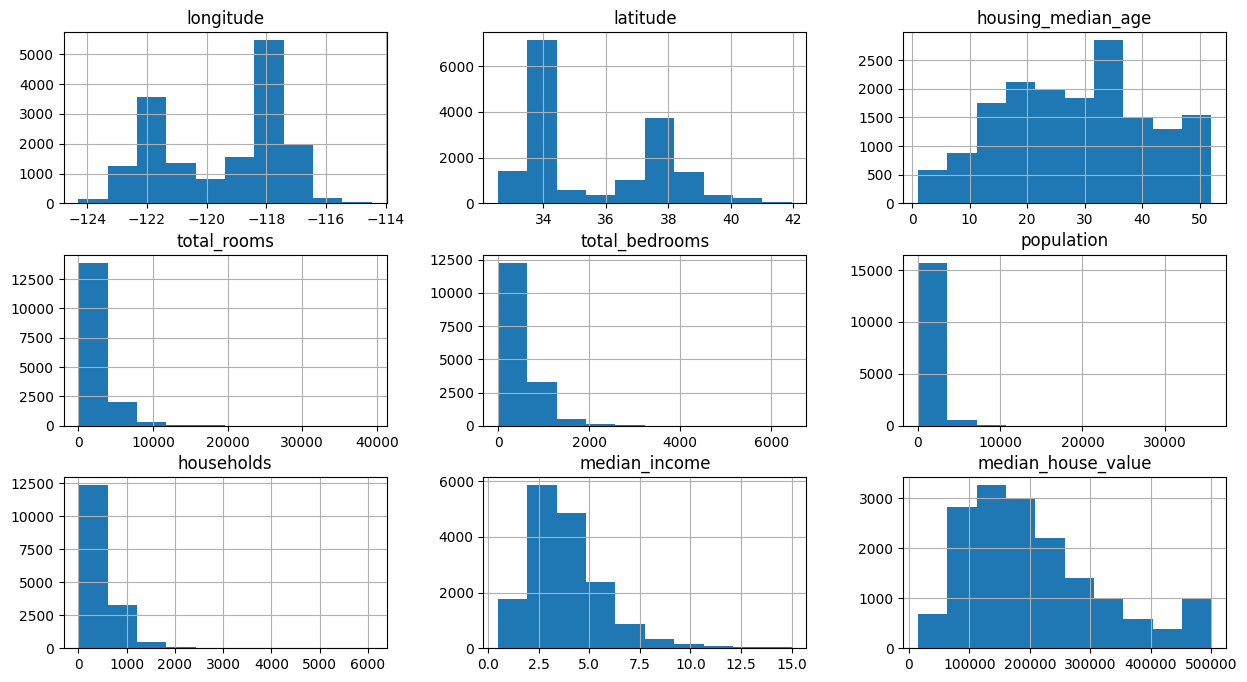

In [44]:
train_data.hist(figsize=(15,8))

In [45]:
train_data['households']=np.log(train_data['households']+1)
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

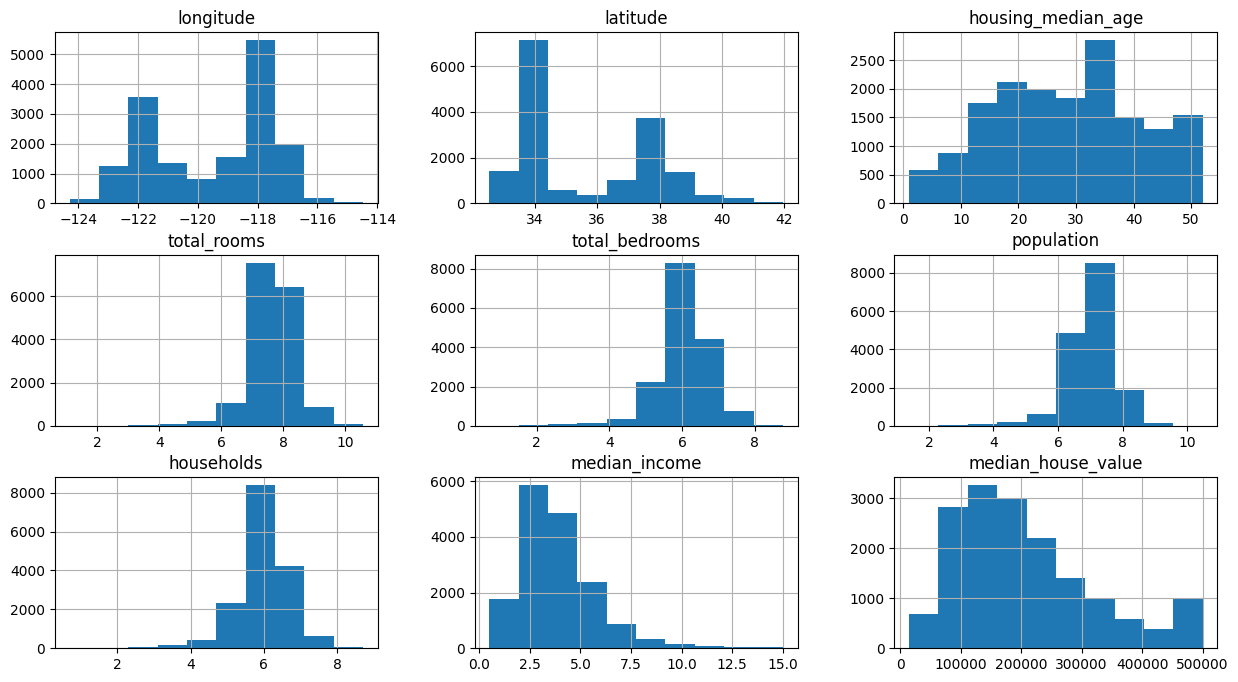

In [46]:
train_data.hist(figsize=(15,8))

<Axes: >

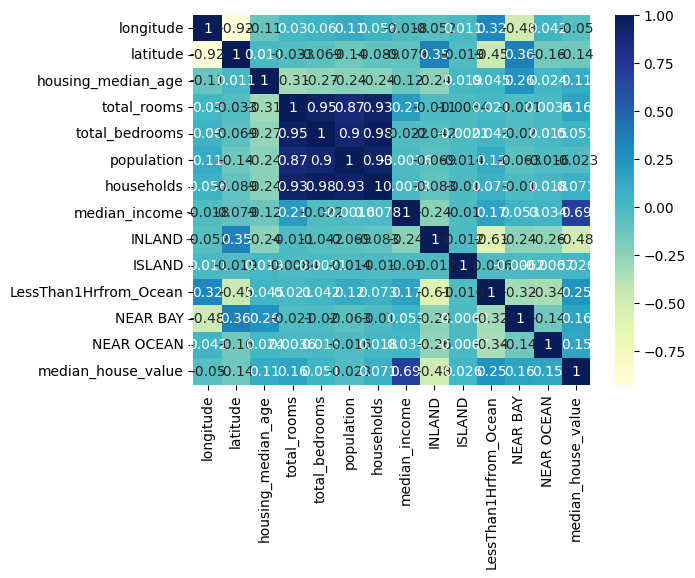

In [47]:
plt.Figure(figsize=(20,15))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

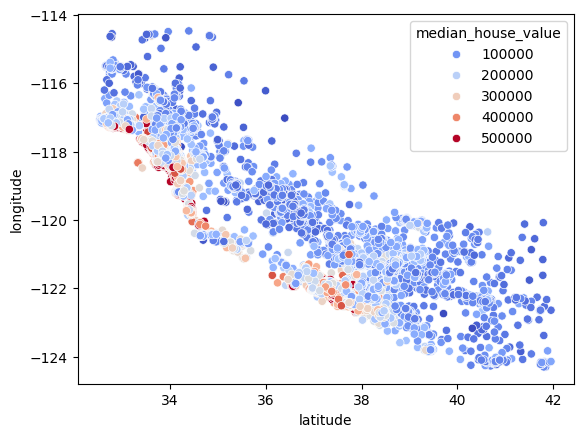

In [48]:
plt.Figure(figsize=(15,8))
sns.scatterplot(x= "latitude",y="longitude",data=train_data,hue="median_house_value",palette="coolwarm")

In [49]:
## feature engineering -->

x_train['bedroom_ratio']=x_train['total_bedrooms']/x_train['total_rooms']
x_train['houshold_ratio']=x_train['households']/x_train['total_rooms']


In [50]:
x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,INLAND,ISLAND,LessThan1Hrfrom_Ocean,NEAR BAY,NEAR OCEAN,bedroom_ratio,houshold_ratio
15500,-117.26,33.09,22,2398,407.0,349,169,7.0423,False,False,False,False,True,0.169725,0.070475
17766,-121.85,37.34,27,1481,409.0,1505,391,2.5769,False,False,True,False,False,0.276165,0.264011
19491,-120.99,37.65,44,2848,623.0,1408,576,2.1487,True,False,False,False,False,0.218750,0.202247
5684,-118.28,33.68,8,2842,522.0,1624,510,3.7282,False,False,False,False,True,0.183673,0.179451
3909,-118.52,34.20,37,1795,346.0,1082,354,4.9102,False,False,True,False,False,0.192758,0.197214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3861,-118.44,34.16,35,3080,642.0,1362,623,4.1218,False,False,True,False,False,0.208442,0.202273
2005,-119.80,36.74,25,1717,542.0,1343,471,0.7990,True,False,False,False,False,0.315667,0.274316
7028,-118.09,33.95,36,1991,396.0,1306,403,4.5000,False,False,True,False,False,0.198895,0.202411
2877,-118.98,35.38,39,1497,383.0,1182,355,1.0648,True,False,False,False,False,0.255845,0.237141


In [51]:
## making the test data of the same format 

test_data=x_test.join(y_test)

test_data['households']=np.log(test_data['households']+1)
test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)



## feature engineering -->

test_data['bedroom_ratio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['houshold_ratio']=test_data['households']/test_data['total_rooms']

test_data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,INLAND,ISLAND,LessThan1Hrfrom_Ocean,NEAR BAY,NEAR OCEAN,median_house_value,bedroom_ratio,houshold_ratio
1835,-122.30,37.90,37,7.661998,6.194405,6.816736,6.137727,2.9219,False,False,False,True,False,217200,0.808458,0.801061
3139,-118.17,34.87,9,7.318540,5.683580,6.635947,5.631212,3.0184,True,False,False,False,False,87900,0.776600,0.769445
20404,-118.87,34.21,26,8.398410,6.424869,7.540090,6.385194,6.2935,False,False,True,False,False,258000,0.765010,0.760286
7813,-118.11,33.90,35,7.865188,6.206576,7.290293,6.154858,4.4896,False,False,True,False,False,184600,0.789120,0.782544
12460,-114.60,33.60,21,7.595387,6.182085,7.075809,6.082219,1.6250,True,False,False,False,False,62000,0.813926,0.800778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-121.98,37.54,17,8.543640,7.226936,8.127700,7.200425,3.1326,False,False,True,False,False,220800,0.845885,0.842782
10390,-117.65,33.57,5,7.600402,6.216606,7.078342,6.102559,4.3542,False,False,True,False,False,195600,0.817931,0.802926
7758,-118.13,33.91,34,6.821107,5.093750,6.315358,5.105945,4.9107,False,False,True,False,False,222000,0.746763,0.748551
12468,-121.45,38.58,44,7.747165,6.030685,6.680855,5.963579,3.4914,True,False,False,False,False,153900,0.778438,0.769776


In [52]:
## extracitng x and y test values 

x_test,y_test=test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']

In [53]:
type(x_train)


pandas.core.frame.DataFrame

In [54]:
## now this data needs to be converted in numpy array to run accordingly 
x_train_num=x_train.to_numpy(dtype='float')
y_train_num=y_train.to_numpy(dtype='float')
x_test_num=x_test.to_numpy(dtype='float')
y_test_num=y_test.to_numpy(dtype='float')          

In [55]:
type(y_test_num)

numpy.ndarray

In [56]:
y_test_num.shape[0]

4087

## Function to check rmse error 

In [64]:
def RMSE_error(y_prediction,y_true):
    rmse=0;
    m=y_true.shape[0]
    for i in range(m):
        rmse+=(y_true[i]-y_prediction[i])**2
    rmse=np.sqrt(rmse/m)

    return rmse



## Prediction Model using Gradient Descent Algorithm by Numpy

In [58]:
def predict(x,w,b):
    f_wb=np.dot(x,w)+b
    return f_wb

def compute_m_cost(x,y,w,b):
    cost_sum=0
    m=x.shape[0]
    for i in range(m):
        f_wb_i=np.dot(x,w)+b
        cost=(y[i]-f_wb_i[i])**2
        cost_sum=cost_sum+cost 
    cost_sum=cost_sum/(2*m)
    return cost_sum


def compute_gradient_m(x,y,w,b):
    m,n=x.shape
    dj_dw=np.zeros((n,))
    dj_db=0
    for i in range(m):
        err=(np.dot(w,x[i])+b-y[i])
        for j in range(n):
            dj_dw[j]=dj_dw[j]+err*x[i,j]
        dj_db=err+dj_db  
    dj_db/=m
    dj_dw/=m
    return dj_dw,dj_db

import copy, math
def gradient_decent_m(x,y,w_in,b_in,alpha,num_iterations,compute_gradient_m,compute_m_cost):
    j_history=[] 
    w=copy.deepcopy(w_in)
    b=b_in
    for i in range(num_iterations):
        dj_dw,dj_db=compute_gradient_m(x,y,w,b)
        w=w-alpha*dj_dw
        b=b-alpha*dj_db
        if(i<10000):
            j_history.append(compute_m_cost(x,y,w,b))
    return w,b,j_history

inti_w=np.zeros(15)
inti_b=0
iterations=1
alpha=5.0e-7
w_final,b_final,j_history=gradient_decent_m(x_train_num,y_train_num,inti_w,inti_b,alpha,iterations,compute_gradient_m,compute_m_cost)
print(w_final)
print(b_final)




[-1.24250256e+01  3.68353707e+00  3.05037562e+00  2.91327005e+02
  5.70827324e+01  1.46699490e+02  5.33142568e+01  4.78930339e-01
  1.99237679e-02  5.81854888e-05  5.32401146e-02  1.44892314e-02
  1.61545171e-02  2.12268298e-02  1.99889219e-02]
0.10386581659121497


## prediction by using Gradient Descent algorythm and RMS error

In [65]:
predictions=predict(x_test_num,w_final,b_final)

error_by_Gradient_descent=RMSE_error(predictions,y_test_num)
print("The Rmse Error by Gradient Descent Algo: ",error_by_Gradient_descent)


The Rmse Error by Gradient Descent Algo:  228531.30715644767


## Prediction Model Using COnvolutional Neural Network by Tensorflow & Keras

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [67]:
## normalising the data

norm_data=tf.keras.layers.Normalization(axis=-1)

norm_data.adapt(x_train_num)
x_train_num_normalised=norm_data(x_train_num)

In [68]:
## model creation 
model = Sequential(
    [
        tf.keras.Input(shape=(15,)),
        Dense(100, activation='relu'),
        Dense(15, activation='relu'),
        Dense(1, activation='linear'),

     ]
)


In [69]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1600      
                                                                 
 dense_1 (Dense)             (None, 15)                1515      
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 3131 (12.23 KB)
Trainable params: 3131 (12.23 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [70]:
model.compile(
    loss = tf.keras.losses.MeanSquaredError(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
)

model.fit(x_train_num_normalised,y_train_num,epochs=10)

Epoch 1/10
511/511 [==============================] - 3s 1ms/step - loss: 27629598720.0000
Epoch 2/10
511/511 [==============================] - 1s 1ms/step - loss: 6582409216.0000
Epoch 3/10
511/511 [==============================] - 1s 984us/step - loss: 5227595264.0000
Epoch 4/10
511/511 [==============================] - 0s 974us/step - loss: 4759153152.0000
Epoch 5/10
511/511 [==============================] - 1s 979us/step - loss: 4561913856.0000
Epoch 6/10
511/511 [==============================] - 1s 983us/step - loss: 4455612416.0000
Epoch 7/10
511/511 [==============================] - 1s 1ms/step - loss: 4385199616.0000
Epoch 8/10
511/511 [==============================] - 0s 978us/step - loss: 4337132544.0000
Epoch 9/10
511/511 [==============================] - 1s 1ms/step - loss: 4297526272.0000
Epoch 10/10
511/511 [==============================] - 1s 983us/step - loss: 4256314112.0000
